# Logistic回归

Logistic回归（Logit回归）是统计学、机器学习中非常常用的解决分类问题的统计方法。

我们首先介绍二分类问题。

二分类问题指被解释变量为0/1两个取值的情况。比如，我们可能需要判断一封电子邮件是否为垃圾邮件（垃圾邮件=1，否则=0），或者我们需要预测哪些个体会参与到某个项目中（参与=1）、是否会上大学（上大学=1）。

令$\left(y_{i},x_{i}'\right)',i=1,...,N,x_{i}\in\mathbb{R}^{K}$，而其中$y_{i}$为**二元变量**（**binary variable**），即$y_{i}\in\left\{ 0,1\right\} $，那么其条件期望：$$\mathbb{E}\left(y_{i}|x_{i}\right)=1\cdot P\left(y_{i}|x_{i}\right)+0\cdot\left(1-P\left(y_{i}|x_{i}\right)\right)=P\left(y_{i}|x_{i}\right)$$即条件期望为给定$x_{i}，y_{i}=1$的条件概率。然而如果我们使用线性回归，线性函数$x_{i}'\beta$不能够保证一定在$\left(0,1\right)$区间范围以内，因而此时使用线性回归拟合上述条件期望就不再合适。

为了避免以上问题，我们可以将概率$P\left(y_{i}|x_{i}\right)$建模为一个概率分布，一个常用的假设是：$$P\left(y_{i}=1|x_{i},\beta\right)=F\left(x_{i}'\beta\right)=\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}$$由于函数$F\left(x\right)=\frac{e^{x}}{1+e^{x}}$为一个Logistic分布的分布函数，因而其函数值一定是单调的且在$\left(0,1\right)$之间的。以上模型我们通常称为**逻辑斯蒂回归**（**Logistic regression**）。

我们将$y_{i}=1$的概率与$y_{i}=0$的概率的比值成为**几率**（**odds**），那么根据以上设定，该模型的几率为：$$odds=\frac{P\left(y_{i}=1|x_{i},\beta\right)}{P\left(y_{i}=0|x_{i},\beta\right)}=\frac{\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}{1-\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}=e^{x_{i}'\beta}$$而**对数几率**（**log odds**，也称为**logit**）为：$$logit=\ln\left(odds\right)=x_{i}'\beta$$因而以上模型被称为**对数几率回归**（**Logit regression**）。

为了估计上述模型中的$\beta$，我们可以使用条件极大似然法。以上模型的条件密度函数为：$$f\left(y_{i}|x_{i},\beta\right)=\left[\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=1\right\} }\left[\frac{1}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=0\right\} }$$因而极大似然函数为：$$L\left(\beta|y,x\right)=\sum_{i=1}^{N}\left[y_{i}\ln\left(\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right)+\left(1-y_{i}\right)\ln\left(\frac{1}{1+e^{x_{i}'\beta}}\right)\right]$$最大化以上似然函数，就可以得到$\beta$的一致估计$\hat{\beta}$。进而得到$p\left(x_{i}\right)=P\left(y_{i}=1|x_{i}\right)$，即给定$x_{i}，y_{i}=1$的概率的估计:$$\hat{p}_{i}\overset{\Delta}{=}\widehat{P\left(y_{i}=1|x_{i}\right)}=F\left(x_{i}'\hat{\beta}\right)$$

In [1]:
import pandas as pd
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()

,persnr,year,employment,chld6,chld16,age,income,husworkhour,husemployment,region,edu,husedu
0,9401,2008,[1] Employed 1,0,0,48,50682,1923,1,0,13.0,12.0
1,9401,2009,[1] Employed 1,0,0,49,45880,2078,1,0,13.0,12.0
2,9401,2010,[1] Employed 1,0,0,50,48690,2078,1,0,13.0,12.0
3,9401,2011,[1] Employed 1,0,0,51,52832,2494,1,0,13.0,12.0
4,9401,2012,[1] Employed 1,0,0,52,55790,2078,1,0,13.0,12.0


In [2]:
import numpy as np

data=raw_data.set_index(['persnr','year'])
data['log_income']=np.log(data['income'])
data['age2']=np.power(data['age'],2)
data=data.drop('income',axis=1)
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
data.head()

employment  chld6  chld16  age  husworkhour  husemployment   edu  \
persnr year                                                                     
9401   2008        True      0       0   48         1923              1  13.0   
       2009        True      0       0   49         2078              1  13.0   
       2010        True      0       0   50         2078              1  13.0   
       2011        True      0       0   51         2494              1  13.0   
       2012        True      0       0   52         2078              1  13.0   

             husedu  log_income  age2  [1] West-Germany   1  
persnr year                                                  
9401   2008    12.0   10.833326  2304                     0  
       2009    12.0   10.733785  2401                     0  
       2010    12.0   10.793229  2500                     0  
       2011    12.0   10.874872  2601                     0  
       2012    12.0   10.929350  2704                     0

In [3]:
y=data['employment']
X=data.drop('employment',axis=1)
y.mean()

0.8260999254287845

In [4]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='none')
LR.fit(X,y)  ## 训练模型
LR.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.06096666e+00, -2.81896152e-01,  1.86446253e-01,
         3.87155651e-04,  6.23513216e-02,  1.03962276e-01,
        -3.50542733e-02, -3.51938557e-01, -2.14296767e-03,
         4.67124110e-01]])

值得注意的是我们特地加了一个选项「penalty='none'」，即没有惩罚项，做普通的Logistic回归。默认情况会使用L2正则化，与我们平常的Logistic回归并不是一回事情，这里需要注意。

模型训练好之后，当然可以计算预测概率：

In [5]:
LR.predict_proba(X)

array([[0.1285558 , 0.8714442 ],
       [0.12053127, 0.87946873],
       [0.12556214, 0.87443786],
       ...,
       [0.19748212, 0.80251788],
       [0.18488262, 0.81511738],
       [0.18197721, 0.81802279]])

注意以上的概率有两列，分别是按照可能的结果排序的（False,True）的概率值，我们希望得到True的概率，所以：

In [6]:
data['prob']=LR.predict_proba(X)[:,1]
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  
persnr  year                                                                  
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444  
        2009  13.0    12.0   10.733785  2401                     0  0.879469  
        2010  13.0    12.0   10.793229  2500                     0  0.874438  
        2011  13.0    12.0   10.874872  2601                     0  0.885250  
        2012  13.0    12.0   10.929350  2704                     0  0.861595  
...            ...     ...         ...   ...                   ...       ...  
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598  
        2009  11.5    11.5   10.079539   576                     0  0.790676  
        2010  11.5    11.5   10.103240   625                     0  0.802518  
        2011  11.5    11.5   10.090880   676                     0  0.815117  
        2012  11.5    11.5   10.242813   729                     0  0.818023  

[6705 rows x 12 columns]

In [7]:
data['pred']=LR.predict(X)
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  \
persnr  year                                                                   
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444   
        2009  13.0    12.0   10.733785  2401                     0  0.879469   
        2010  13.0    12.0   10.793229  2500                     0  0.874438   
        2011  13.0    12.0   10.874872  2601                     0  0.885250   
        2012  13.0    12.0   10.929350  2704                     0  0.861595   
...            ...     ...         ...   ...                   ...       ...   
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598   
        2009  11.5    11.5   10.079539   576                     0  0.790676   
        2010  11.5    11.5   10.103240   625                     0  0.802518   
        2011  11.5    11.5   10.090880   676                     0  0.815117   
        2012  11.5    11.5   10.242813   729                     0  0.818023   

              pred  
persnr  year        
9401    2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  
...            ...  
8270802 2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  

[6705 rows x 13 columns]

接下来可以计算一些指标：

In [8]:
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5524
TN= 23
FP= 1143
FN= 15
查全率=敏感性= 0.9972919299512547
查准率= 0.8285585720713964
特异性= 0.01972555746140652


包括画出ROC曲线：

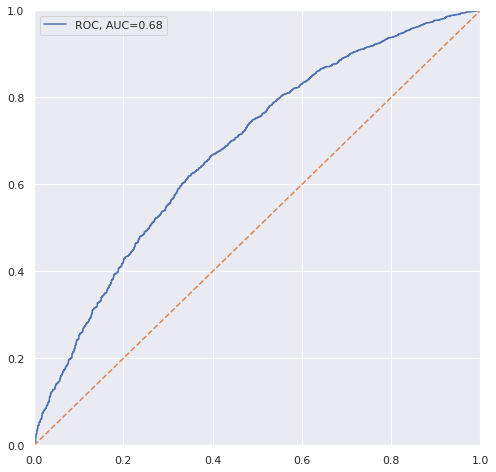

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()